In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score
from sklearn.pipeline import make_pipeline


In [2]:
road = 1
direction = "out"
df = pd.read_csv(
    f"../dataset/cluster/2020-02-road{road}-{direction}-5cluster.csv", parse_dates=["datetime"])
df['label'] = df['cluster'].apply(lambda row: 1 if row == 0 or row == 2 else 0)
df


,datetime,road_number,km,direction,all_units,inflow_units,outflow_unit,samecell_units,avg_speed,max_speed,avg_traveltime,max_traveltime,inflow_units_N,outflow_units_N,avg_speed_N,cluster,label
0,2020-02-01 00:00:34,1,25,out,1,0,0,1,43,43,0,0,0.000000,0.000000,0.5375,2,1
1,2020-02-01 00:00:34,1,26,out,1,0,0,1,71,71,0,0,0.000000,0.000000,0.8875,4,0
2,2020-02-01 00:00:34,1,27,out,1,0,0,1,0,0,0,0,0.000000,0.000000,0.0000,0,1
3,2020-02-01 00:00:34,1,28,out,2,1,2,1,41,48,0,0,0.021739,0.045455,0.5125,2,1
4,2020-02-01 00:00:34,1,29,out,3,3,4,0,75,108,0,0,0.065217,0.090909,0.9375,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22668874,2020-02-29 23:59:14,1,925,out,0,0,1,0,0,0,0,0,0.000000,0.022727,0.0000,0,1
22668875,2020-02-29 23:59:14,1,926,out,1,1,0,0,51,51,60,60,0.021739,0.000000,0.6375,1,0
22668876,2020-02-29 23:59:14,1,939,out,1,0,0,1,57,57,0,0,0.000000,0.000000,0.7125,1,0
22668877,2020-02-29 23:59:14,1,953,out,0,0,1,0,0,0,0,0,0.000000,0.022727,0.0000,0,1


In [18]:
df[df['label']==1].max(axis=0)

datetime           2020-02-29 23:59:14
road_number                          1
km                                 993
direction                          out
all_units                          111
inflow_units                        27
outflow_unit                        29
samecell_units                      93
avg_speed                           44
max_speed                          180
avg_traveltime                     996
max_traveltime                     998
inflow_units_N                0.586957
outflow_units_N               0.659091
avg_speed_N                       0.55
cluster                              2
label                                1
dtype: object

In [4]:
df_corr = df.filter(['all_units','inflow_units','outflow_unit','samecell_units','avg_speed','max_speed','avg_traveltime','max_traveltime','cluster','label'],axis=1)
corr = df_corr.corr()

<AxesSubplot:>

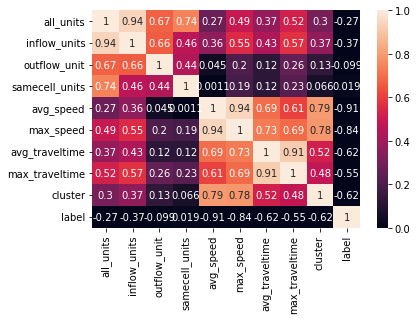

In [5]:
sns.heatmap(corr, vmin=0, vmax=1, annot=True)


In [6]:
num_cols = ['all_units', 'inflow_units',
            'avg_speed', 'max_speed',
            'avg_traveltime',"max_traveltime"]
num_cols

['all_units',
 'inflow_units',
 'avg_speed',
 'max_speed',
 'avg_traveltime',
 'max_traveltime']

In [7]:
X=df[num_cols]
y=df['cluster']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [9]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [10]:
y_pred = tree.predict(x_test)

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   2271036
           1       0.96      0.97      0.97   2103022
           2       0.98      0.98      0.98    748948
           3       0.75      0.71      0.73    441175
           4       0.99      0.99      0.99   1916550

    accuracy                           0.97   7480731
   macro avg       0.94      0.93      0.93   7480731
weighted avg       0.97      0.97      0.97   7480731



In [12]:
print(accuracy_score(y_test, y_pred))

0.9691305568934373


In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)

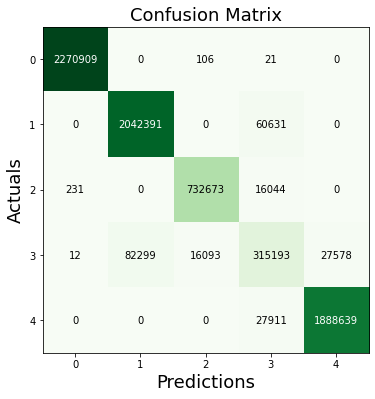

In [14]:
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [15]:
# import joblib
# joblib.dump(tree, f"DecisionTreeModelRoad{road}{direction}.joblib")
